In [58]:
# Three trends/description:
# In general, the average fair in Rural areas is the highest, and urban cities is the lowest. 
# In general, the total number of rides is higher in urban cities, and lowest in rural areas. 
# There are more number of urban drivers than there are rural drivers. 
# More number of cabs are needed in urban and suburban cities to generate the same revenue as urban cities,
#     but we have to take into consideration the growth and population/population migration of those rural and suburban areas. 
# Description: Below we have analyzed the data of drivers, rides, and shares of taxi companies. 
# 

In [52]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns 
import os

In [53]:
cit_df = pd.read_csv("./raw_data/city_data.csv")
rid_df = pd.read_csv("./raw_data/ride_data.csv")

merged_df = pd.merge(cit_df, rid_df, how ='inner', left_on = 'city', right_on= 'city')
merged_df = merged_df.drop_duplicates()
merged_df.head()

,city,driver_count,type,date,fare,ride_id
0,Kelseyland,63,Urban,2016-08-19 04:27:52,5.51,6246006544795
1,Kelseyland,63,Urban,2016-04-17 06:59:50,5.54,7466473222333
2,Kelseyland,63,Urban,2016-05-04 15:06:07,30.54,2140501382736
3,Kelseyland,63,Urban,2016-01-25 20:44:56,12.08,1896987891309
4,Kelseyland,63,Urban,2016-08-09 18:19:47,17.91,8784212854829


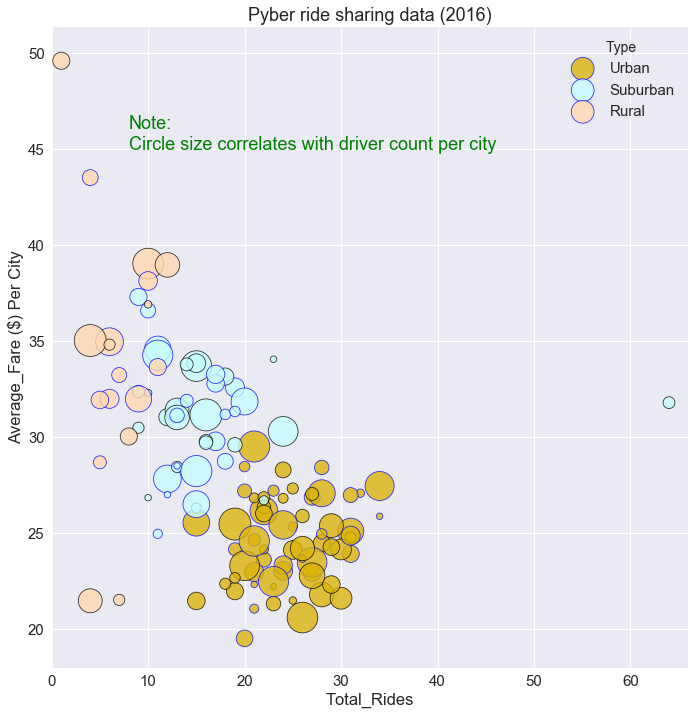

In [54]:
city_grouped = merged_df.groupby("city")

average_fare = city_grouped["fare"].mean().to_frame(name= "Average_Fare ($) Per City") 
total_rides = city_grouped["ride_id"].count().to_frame(name= "Total_Rides")     
total_drivers = city_grouped["driver_count"].mean().to_frame(name= "Total_Drivers")
type_of_city = city_grouped["type"].unique().to_frame(name= "Type")
type_of_city["Type"] =type_of_city["Type"].map(lambda x: x[0]) #without this, type is printed as "[Urban]", not "Urban"
city_grouped_df = pd.concat([average_fare, total_rides, total_drivers, type_of_city], axis=1)

markersize = 14 * city_grouped_df['Total_Drivers'] #suitable multiplier (14) to see size difference in bubbles
kws = dict(s=markersize, linewidth=.8, edgecolor="bk")
sns.set(font_scale = 1.5)

max_rides = city_grouped_df['Total_Rides'].max()

pyber_palette = ['#dbb40c', '#c6fcff', '#ffd8b1']  # Gold, light Sky blue, light coral

sns.lmplot(x='Total_Rides', y='Average_Fare ($) Per City', data=city_grouped_df,
            fit_reg=False, # No regression line should be displayed
            palette=pyber_palette, 
            scatter_kws=kws,
            hue='Type',
            size = 10,
            legend_out=False)
plt.text(8, 45, "Note:\nCircle size correlates with driver count per city", horizontalalignment='left',size='medium', color='green', weight='light')
plt.title("Pyber ride sharing data (2016)")
plt.xlim(0, max_rides+2)    # margin so plot doesn't end at max value
plt.show()

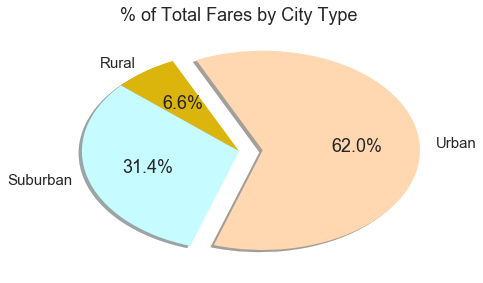

In [55]:
citytype_grouped = merged_df.groupby("type")
# % of total fares by city type

total_fare = merged_df["fare"].sum()

# Create a list of colors 
pyber_palette = ['#dbb40c', '#c6fcff', '#ffd8b1']  # Gold, light Sky blue, light coral

percent_fare_df = pd.DataFrame((citytype_grouped["fare"].sum()/total_fare)*100)

# Create a pie chart
plt.pie(
    # using data total
    percent_fare_df['fare'],
    # with the labels being city types
    labels= ['Rural', 'Suburban', 'Urban'],
    # with no shadows
    shadow=True,
    # with colors
    colors=pyber_palette,
    # with one slide exploded out
    explode=(0.00, 0.00, 0.15),
    # with the start angle at 115%
    startangle=115,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# plt.axis('equal') - commented out as we want oval and not circular

# View the plot
plt.tight_layout()
plt.title("% of Total Fares by City Type")
plt.show()

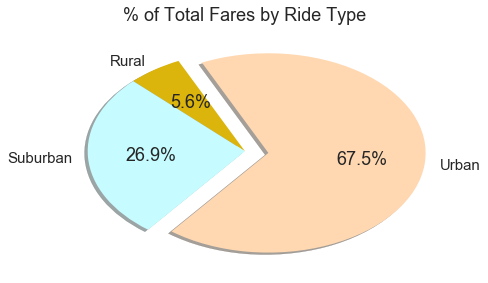

In [56]:
pyber_palette = ['#dbb40c', '#c6fcff', '#ffd8b1']  # Gold, light Sky blue, light coral

percent_ride_df = pd.DataFrame((citytype_grouped["ride_id"].sum()/total_fare)*100)

# Create a pie chart
plt.pie(
    # using data total
    percent_ride_df["ride_id"],
    # with the labels being city types
    labels= ['Rural', 'Suburban', 'Urban'],
    # with no shadows
    shadow=True,
    # with colors
    colors=pyber_palette,
    # with one slide exploded out
    explode=(0.00, 0.00, 0.15),
    # with the start angle at 115%
    startangle=115,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# plt.axis('equal') - commented out as we want oval and not circular

# View the plot
plt.tight_layout()
plt.title("% of Total Fares by Ride Type")
plt.show()

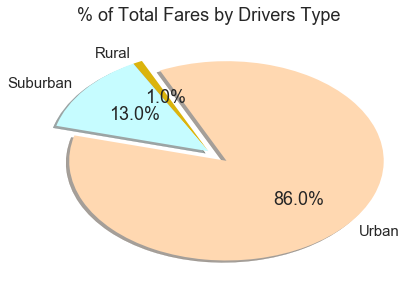

In [57]:
pyber_palette = ['#dbb40c', '#c6fcff', '#ffd8b1']  # Gold, light Sky blue, light coral

percent_drivers_df = pd.DataFrame((citytype_grouped["driver_count"].sum()/total_fare)*100)

# Create a pie chart
plt.pie(
    # using data total
    percent_drivers_df["driver_count"],
    # with the labels being city types
    labels= ['Rural', 'Suburban', 'Urban'],
    # with no shadows
    shadow=True,
    # with colors
    colors=pyber_palette,
    # with one slide exploded out
    explode=(0.00, 0.00, 0.15),
    # with the start angle at 115%
    startangle=115,
    # with the percent listed as a fraction
    autopct='%1.1f%%',
    )

# plt.axis('equal') - commented out as we want oval and not circular

# View the plot
plt.tight_layout()
plt.title("% of Total Fares by Drivers Type")
plt.show()